# Dataset Description

<h2> Kaggle Dataset </h2>

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

<b> Acknowledgements

1. Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
2. Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.


This is a countrywide car accident dataset that covers 48 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors 
within the road networks. The dataset currently contains approximately 7.7 million accident records.

<h2> Department of Transportation Data</h2>

https://www.fhwa.dot.gov/policyinformation/statistics/2022/dl201.cfm?utm_source=chatgpt.com

<h1> Importing Libraries </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

In [4]:
warnings.simplefilter('ignore')

In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

<h1> Pickling the Data </h1>

<p> Since the data contains 7.7M Records, we have pickled the file for faster loading of the data.</p>

In [10]:
# df = pd.read_csv("US_Accidents_March23.csv")
# df.to_pickle("data.pkl")

In [12]:
df = pd.read_pickle("data.pkl")

In [13]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:
df.shape

(7728394, 46)

In [16]:
df.describe(include = 'all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7553188,7.157161e+06,5.524808e+06,7554935,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7705148,7705148,7705148,7705148
unique,7728394,3,NaN,6131796,6705355,NaN,NaN,NaN,NaN,NaN,3761578,336306,13678,1871,49,825094,1,4,2045,941331,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,144,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-1,Source1,NaN,2021-01-26 16:16:13,2021-11-22 08:00:00,NaN,NaN,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,NaN,NaN,NaN,NaN,NaN,CALM,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,4325632,NaN,225,112,NaN,NaN,NaN,NaN,NaN,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,NaN,NaN,NaN,NaN,NaN,961624,NaN,NaN,2560802,7632060,7724880,6854631,7691812,7157052,7708849,7661415,7728145,7526493,7514023,7720796,6584622,7728394,5334553,5695619,6076156,6377548
mean,NaN,NaN,2.212384e+00,NaN,NaN,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,NaN,7.685490e+00,8.407210e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.875313e-01,NaN,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,NaN,5.424983e+00,1.102246e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000e+00,NaN,NaN,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,NaN,4.600000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000e+00,NaN,NaN,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,NaN,7.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000e+00,NaN,NaN,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,NaN,1.040000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1> 1. Data Cleaning - US Accidents Data </h1>

<h3> Droppings Irrelavant Columns </h3>

In [18]:
df = df.drop(columns = ["ID", "Source", "Country","Timezone","Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "Weather_Timestamp", "County", "End_Lat", "End_Lng", "Wind_Direction"])

<p> Checking Turning_Loop Column </p>

In [17]:
df["Turning_Loop"].value_counts()

Turning_Loop
False    7728394
Name: count, dtype: int64

<p> Since every record has the same value, the columns is dropped</p>

In [20]:
df = df.drop(columns=["Turning_Loop"])

In [21]:
df.shape

(7728394, 33)

In [24]:
numeric_features = ['Start_Lat', 'Start_Lng',
       'Distance(mi)','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']

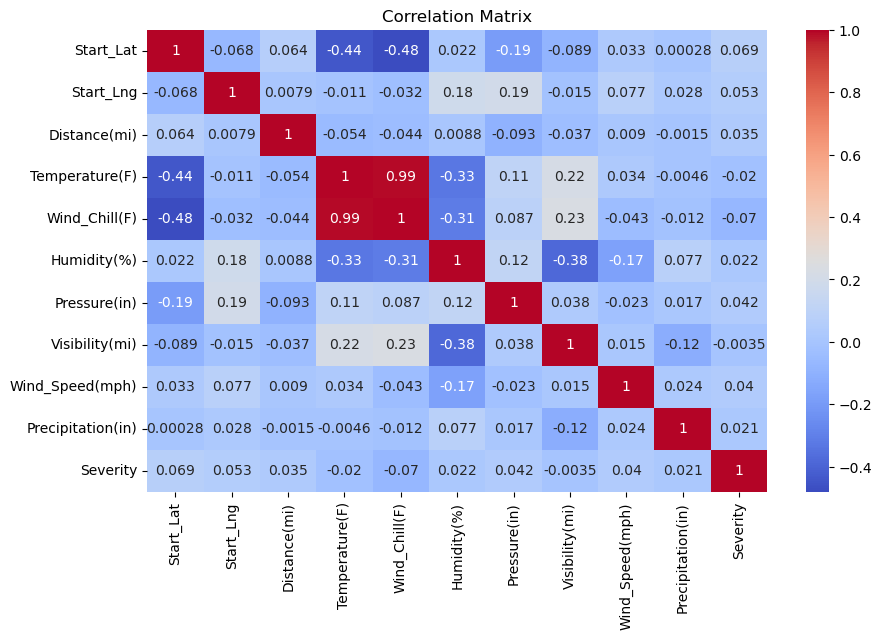

In [26]:
correlations = df[numeric_features + ['Severity']].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.gcf().savefig("Feature_Correlation.png")
plt.show()

In [41]:
correlations

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity
Start_Lat,1.000000,-0.067720,0.064064,-0.443781,-0.480296,0.022364,-0.194094,-0.088500,0.032908,0.000279,0.069060
Start_Lng,-0.067720,1.000000,0.007851,-0.010652,-0.031810,0.179500,0.193185,-0.015322,0.077353,0.027619,0.052862
Distance(mi),0.064064,0.007851,1.000000,-0.054082,-0.044309,0.008780,-0.093121,-0.037225,0.008989,-0.001480,0.034787
Temperature(F),-0.443781,-0.010652,-0.054082,1.000000,0.993744,-0.330939,0.109500,0.217173,0.033750,-0.004633,-0.020327
Wind_Chill(F),-0.480296,-0.031810,-0.044309,0.993744,1.000000,-0.314731,0.086598,0.234022,-0.043008,-0.012143,-0.070039
Humidity(%),0.022364,0.179500,0.008780,-0.330939,-0.314731,1.000000,0.115573,-0.384261,-0.172403,0.076936,0.022293
Pressure(in),-0.194094,0.193185,-0.093121,0.109500,0.086598,0.115573,1.000000,0.038161,-0.022609,0.016511,0.042347
Visibility(mi),-0.088500,-0.015322,-0.037225,0.217173,0.234022,-0.384261,0.038161,1.000000,0.014650,-0.119796,-0.003473
Wind_Speed(mph),0.032908,0.077353,0.008989,0.033750,-0.043008,-0.172403,-0.022609,0.014650,1.000000,0.024202,0.040214
Precipitation(in),0.000279,0.027619,-0.001480,-0.004633,-0.012143,0.076936,0.016511,-0.119796,0.024202,1.000000,0.021080


<p> Since Temperature & Wind Chill are Highly related, we are dropping Wind Chill </p>

In [28]:
df = df.drop(columns=['Wind_Chill(F)'])

In [30]:
df.shape

(7728394, 32)

<h3> Assigning Appropriate Data Types </h3>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Distance(mi)       float64
 6   Description        object 
 7   Street             object 
 8   City               object 
 9   State              object 
 10  Zipcode            object 
 11  Timezone           object 
 12  Airport_Code       object 
 13  Temperature(F)     float64
 14  Humidity(%)        float64
 15  Pressure(in)       float64
 16  Visibility(mi)     float64
 17  Wind_Speed(mph)    float64
 18  Precipitation(in)  float64
 19  Weather_Condition  object 
 20  Amenity            bool   
 21  Bump               bool   
 22  Crossing           bool   
 23  Give_Way           bool   
 24  Junction           bool   
 25  No_Exit           

<b> Summary of transformations applied to column to assign appropriate data types. </b>

<table>
    <tr>
        <th> Column </th>
        <th> Old Data Type </th>
        <th> New Data Type </th>
    </tr>
    <tr>
        <td> Start_Time </td>
        <td> object </td>
        <td> Datetime </td>
    </tr>
    <tr>
        <td> End_Time </td>
        <td> object </td>
        <td> Datetime </td>
    </tr>
    <tr>
        <td> Zipcode </td>
        <td> object </td>
        <td> Integer </td>
    </tr>
    <tr>
        <td> Sunrise_Sunset </td>
        <td> object </td>
        <td> Boolean </td>
    </tr>

</table>

In [32]:
df["Start_Time"] = df["Start_Time"].astype("datetime64[ns]")
df["End_Time"] = df["End_Time"].astype("datetime64[ns]")

<p> Working with Zipcode </p>

In [34]:
#To check whether the record is an integer or not
def checkisInt(x):
    try:
        int(x)
        return True
    except Exception as e :
        return False

In [36]:
df[~df["Zipcode"].apply(checkisInt)]

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,State,Zipcode,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,OH,43068-3402,KCMH,37.9,100.0,29.65,10.0,NaN,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night
6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,OH,45417-2476,KDAY,34.0,100.0,29.66,7.0,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day
8,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.000,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,OH,45404-1923,KFFO,33.3,99.0,29.67,5.0,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day
12,2,2016-02-08 08:36:34,2016-02-08 09:06:34,39.737633,-84.149933,0.000,Accident on Revere Ave at Watervliet Ave. Expe...,Watervliet Ave,Dayton,OH,45420-1863,KFFO,33.8,100.0,29.63,3.0,2.3,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day
13,2,2016-02-08 08:37:07,2016-02-08 09:07:07,39.790760,-84.241547,0.010,Accident on Salem Ave at Hillcrest Ave / Kensi...,Salem Ave,Dayton,OH,45406-2708,KDAY,36.0,89.0,29.65,10.0,5.8,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728340,2,2019-08-23 14:44:22,2019-08-23 15:11:51,37.573253,-122.340625,0.057,At Warren Rd - Accident. Lane blocked.,State St,San Mateo,CA,94401-2213,KSFO,78.0,52.0,29.78,10.0,6.0,0.0,Fair,False,False,False,False,False,False,False,False,True,False,False,False,Day
7728341,2,2019-08-23 10:14:30,2019-08-27 10:14:14,38.443260,-120.536017,2.281,Between Buckhorn Ridge Rd and Inspiration Dr W...,Buckhorn Ridge Rd,Pioneer,CA,95666-9422,KPVF,82.0,39.0,27.23,10.0,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,True,False,False,Day
7728354,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,0.708,Closed between Yuba City and CA-99/Sawtelle Av...,Thompson Rd,Yuba City,CA,95993-9744,KMYV,98.0,23.0,29.62,10.0,8.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day
7728355,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,0.708,Closed between CA-99/Sawtelle Ave and Yuba Cit...,Tudor Rd,Yuba City,CA,95993-9513,KMYV,98.0,23.0,29.62,10.0,8.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day


<p> So many Zipcodes are in the form xxxx - yyyy, we are required only in the part before the hypen so will extract it.</p>

In [38]:
df['Zipcode'] = df['Zipcode'].str.split("-").str[0]

<p> Now converting Sunsrise_Sunset to a boolean column & renaming it to Day </p>
<p> So if its a day, we assign True, otherwise False </p>

In [36]:
df["Sunrise_Sunset"].value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

In [43]:
df.rename(columns = {"Sunrise_Sunset" : "Day"}, inplace = True)

In [45]:
df["Day"].replace(to_replace = "Day", value = True,inplace = True)
df["Day"].replace(to_replace = "Night", value = False,inplace = True)

In [51]:
df.shape

(7728394, 33)

In [53]:
df["month"] = df["Start_Time"].dt.month

<h3> Handling NaN Values </h3>

In [56]:
df.isna().sum()

Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Description                5
Street                 10869
City                     253
State                      0
Zipcode                 1915
Airport_Code           22635
Temperature(F)        163853
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Day                    23246
month                      0
dtype: int64

In [60]:
df.isna().sum() * 100/ df.shape[0]

Severity              0.000000
Start_Time            0.000000
End_Time              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
Description           0.000065
Street                0.140637
City                  0.003274
State                 0.000000
Zipcode               0.024779
Airport_Code          0.292881
Temperature(F)        2.120143
Humidity(%)           2.253301
Pressure(in)          1.820288
Visibility(mi)        2.291524
Wind_Speed(mph)       7.391355
Precipitation(in)    28.512858
Weather_Condition     2.244438
Amenity               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Day                   0.300787
month   

<b> Handling Values for Street </b>

<p> Approach: Assigning Value 'Uknown' to null records.</p>

In [62]:
df["Street"].fillna(value = "Uknown", inplace = True)

<b> Handling Values for City </b>

<p> Approach: Dropping the null records due to little proportion.</p>

In [65]:
df.dropna(subset=['City'], inplace=True)

<b> Handling Values for Description </b>

<p> Approach: Dropping the null records due to little proportion.</p>

In [67]:
df.dropna(subset=['Description'], inplace = True)

<b> Handling Values for Zipcode </b>

<p> Approach: Dropping the null records due to little proportion.</p>

In [69]:
df.dropna(subset=['Zipcode'], inplace = True)

In [70]:
df["Zipcode"] = df["Zipcode"].astype("int64")

<b> Handling Values for Airport_Code </b>

<p> Approach: Dropping the null records due to little proportion.</p>

In [72]:
df.dropna(subset = ['Airport_Code'], inplace = True)

<b> Handling Values for Temperature(F) </b>

<p> Approach: <br>
    1. Got the average Temperature(F) for that city in that month based on Day/Night <br>
    2. If Still Null Persists, Got the average Temperature(F) for that city based on the Weather_Condition. <br>
    3. If Still Null Persists, Dropped It. <br>
</p>

In [75]:
def agg_cleaning(df, column):
    group_means = df.groupby(['City', 'month', 'Day'])[column].transform('mean')
    df[column] = df[column].fillna(group_means)
    return df

In [76]:
def cleaning_on_weather(df, column):
    group_means = df.groupby(['City', 'Weather_Condition'])[column].transform('mean')
    df[column] = df[column].fillna(group_means)
    return df

In [83]:
df = agg_cleaning(df,'Temperature(F)')
df = cleaning_on_weather(df,'Temperature(F)')

In [84]:
df.dropna(subset=['Temperature(F)'], inplace = True)



<b> Handling Values for Humidity(%) </b>

<p> Approach: <br>
    1. Got the average Humidity(%) for that city in that month based on Day/Night <br>
    2. If Still Null Persists, Got the average Humidity(%) for that city based on the Weather_Condition. <br>
    3. If Still Null Persists, Dropped It. <br>
</p>


In [87]:
df = agg_cleaning(df, 'Humidity(%)')
df = cleaning_on_weather(df, 'Humidity(%)')

In [88]:
df.dropna(subset = ['Humidity(%)'], inplace = True)

<b> Handling Values for Pressure(in) </b>

<p> Approach: <br>
    1. Got the average Pressure(in) for that city in that month based on Day/Night <br>
    2. If Still Null Persists, Got the average Pressure(in) for that city based on the Weather_Condition. <br>
    3. If Still Null Persists, Dropped It. <br>
</p>


In [93]:
df = agg_cleaning(df,'Pressure(in)')
df = cleaning_on_weather(df, 'Pressure(in)')

In [94]:
df.dropna(subset = ['Pressure(in)'], inplace = True)

<b> Handling Values for Visibility(mi) </b>

<p> Approach: <br>
    1. Got the average Visibility(mi) for that city in that month based on Day/Night <br>
    2. If Still Null Persists, Got the average Visibility(mi) for that city based on the Weather_Condition. <br>
    3. If Still Null Persists, Dropped It. <br>
</p>

In [98]:
df = agg_cleaning(df,'Visibility(mi)')
df = cleaning_on_weather(df, 'Visibility(mi)')

In [99]:
df.dropna(subset = ['Visibility(mi)'], inplace = True)

<b> Handling Values for Wind_Speed(mph) </b>

<p> Approach: <br>
    1. Got the average Wind_Speed(mph) for that city in that month based on Day/Night <br>
    2. If Still Null Persists, Got the average Wind_Speed(mph) for that city based on the Weather_Condition. <br>
    3. If Still Null Persists, Dropped It. <br>
</p>

In [103]:
df = agg_cleaning(df, 'Wind_Speed(mph)')
df = cleaning_on_weather(df, 'Wind_Speed(mph)')

In [104]:
df.dropna(subset = ['Wind_Speed(mph)'], inplace = True)

<b> Handling Values for Precipitation(in) </b>

<p> Approach: <br>
    1. Based on the weather condition, we replace the null with the average precipitation for a specific weather condition. <br>
    2. If Still Null Persists, Got the average Precipitation(in) for that city in that month based on Day/Night <br>
    3. If Still Null Persists, Got the average Precipitation(in) for that city based on the Weather_Condition. <br>
    4. If Still Null Persists, Dropped It.
</p>

In [107]:
def get_average(df, column) :
    df[column] = df[column].fillna(df.groupby('Weather_Condition')[column].transform('mean'))
    return df

In [109]:
df = get_average(df, 'Precipitation(in)')

In [111]:
df = agg_cleaning(df, 'Precipitation(in)')
df = cleaning_on_weather(df, 'Precipitation(in)')

In [112]:
df.dropna(subset=['Precipitation(in)'], inplace = True)

<b> Handling Values for Weather Condition </b>

<p> Approach: <br>
    1. First we clustered the values in specific buckets <br>
    2. We dropped records with N/A Precipitation since it souds ambiguous. <br>
</p>

In [116]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                                   2560440
Mostly Cloudy                          1016067
Cloudy                                  817015
Clear                                   808309
Partly Cloudy                           698863
Overcast                                382625
Light Rain                              352873
Scattered Clouds                        204719
Light Snow                              128619
Fog                                      99124
Rain                                     84295
Haze                                     76203
Fair / Windy                             35634
Heavy Rain                               32299
Light Drizzle                            22673
Thunder in the Vicinity                  17603
Cloudy / Windy                           17022
T-Storm                                  16805
Mostly Cloudy / Windy                    16506
Snow                                     15527
Thunder                                  1

In [118]:
df.replace(to_replace = ["Clear", "Fair / Windy"], value = "Fair",inplace = True)
df.replace(to_replace = ["Mostly Cloudy", "Partly Cloudy", "Overcast", "Scattered Clouds", "Mostly Cloudy / Windy", "Cloudy / Windy", "Partly Cloudy / Windy"], value = "Cloudy",inplace = True)
df.replace(to_replace = ["Light Rain", "Heavy Rain", "Drizzle", "Light Drizzle","Showers in the Vicinity", "Heavy Drizzle", "Drizzle and Fog", "Rain / Windy", "Heavy Rain / Windy", "Light Rain", "Rain", "Drizzle", "Heavy Rain", "Light Drizzle", "Rain Showers", "Light Rain Shower", "Rain Shower", "Heavy Rain Shower", "Light Rain / Windy", "Rain / Windy", "Light Freezing Rain", "Heavy Freezing Rain", "Freezing Rain", "Light Freezing Rain / Windy", "Freezing Rain / Windy", "Freezing Drizzle", "Heavy Freezing Drizzle", "Light Freezing Drizzle", "Light Drizzle / Windy", "Light Rain Showers", "Drizzle / Windy", "Light Rain Shower / Windy", "Heavy Rain Showers", "Rain Shower / Windy", "Rain and Sleet", "Heavy Freezing Rain / Windy", "Heavy Rain Shower / Windy"], value = "Rain",inplace = True)
df.replace(to_replace = ["Light Snow", "Heavy Snow", "Light Snow / Windy", "Snow / Windy", "Heavy Snow / Windy", "Blowing Snow", "Blowing Snow / Windy", "Snow", "Light Snow", "Snow Showers", "Heavy Snow", "Sleet", "Light Sleet", "Snow and Sleet", "Light Snow and Sleet", "Snow and Sleet / Windy", "Heavy Snow with Thunder", "Light Snow Shower", "Snow and Thunder", "Snow and Thunder / Windy", "Low Drifting Snow", "Drifting Snow / Windy", "Blowing Snow", "Blowing Snow / Windy", "Heavy Blowing Snow", "Small Hail", "Hail", "Heavy Ice Pellets", "Light Ice Pellets", "Ice Pellets", "Heavy Sleet", "Heavy Sleet / Windy", "Sleet and Thunder", "Snow Grains", "Light Snow Grains", "Light Snow and Sleet / Windy","Light Snow with Thunder","Sleet / Windy","Light Snow Showers","Light Sleet / Windy","Light Snow Shower / Windy","Light Hail","Light Blowing Snow","Blowing Snow Nearby","Drifting Snow"], value = "Snow",inplace = True)
df.replace(to_replace=[ "Thunder", "T-Storm", "Thunderstorm", "Light Thunderstorm", "Heavy T-Storm", "Heavy T-Storm / Windy", "Thunder in the Vicinity", "Thunderstorms and Rain", "Light Thunderstorms and Rain", "Heavy Thunderstorms and Rain", "Thunder / Windy", "T-Storm / Windy", "Thunder and Hail", "Thunder and Hail / Windy", "Thunderstorms and Snow", "Heavy Thunderstorms and Snow", "Light Thunderstorms and Snow", "Thunder / Wintry Mix", "Thunder / Wintry Mix / Windy", "Light Rain with Thunder","Heavy Thunderstorms with Small Hail"], value="Thunderstorms", inplace=True) 
df.replace(to_replace=[ "Fog", "Fog / Windy", "Mist", "Mist / Windy", "Light Fog", "Patches of Fog", "Patches of Fog / Windy", "Shallow Fog", "Shallow Fog / Windy", "Haze", "Light Haze", "Haze / Windy", "Smoke", "Light Freezing Fog","Blowing Dust / Windy","Smoke / Windy","Partial Fog","Blowing Sand", "Partial Fog / Windy"], value="Fog", inplace=True) 
df.replace(to_replace=[ "Volcanic Ash", "Funnel Cloud", "Tornado", "Squalls", "Squalls / Windy", "Sand / Dust Whirls Nearby", "Sand / Dust Whirlwinds", "Sand / Dust Whirlwinds / Windy", "Sand", "Sand / Windy", "Blowing Dust", "Widespread Dust", "Widespread Dust / Windy", "Duststorm", "Dust Whirls", "Wintry Mix", "Wintry Mix / Windy", "Heavy Smoke", "Heavy Sleet and Thunder"], value="Extreme", inplace=True) 

In [119]:
df.drop(df[df['Weather_Condition'] == "N/A Precipitation"].index, inplace=True)

In [109]:
df["Weather_Condition"].value_counts(dropna = False)

Weather_Condition
Fair             3404383
Cloudy           3163056
Rain              516974
Fog               202482
Snow              161654
NaN               127315
Thunderstorms      88502
Extreme            12661
Name: count, dtype: int64

In [122]:
df.dropna(subset = ['Weather_Condition'], inplace = True)

<b> Handling Values for Day </b>

<p> Approach: <br>
    1. Calculating the average time of accidents when it is a Day/Night and replacing the null.<br>
</p>

In [123]:
df["Hour_of_Day"] = df["Start_Time"].dt.hour

In [126]:
avg_justtime = (
    df[df['Day'] == True]
    .groupby(['City', 'month'])['Hour_of_Day']
    .mean()
    .reset_index()
    .rename(columns={'Hour_of_Day': 'avg_time_to_be_called_day_based_on_starttime'})
)

In [128]:
df = df.merge(avg_justtime, on=['City', 'month'], how='left')

In [130]:
def clean_day(row):
    if pd.isnull(row['Day']):  
        if row['Hour_of_Day'] > row['avg_time_to_be_called_day_based_on_starttime']:  
            return False
        else:
            return True
    return row['Day'] 

In [132]:
df['Day'] = df.apply(clean_day, axis=1)

In [133]:
df.drop(columns = ['avg_time_to_be_called_day_based_on_starttime'], inplace = True)

In [134]:
df.isna().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
State                0
Zipcode              0
Airport_Code         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Day                  0
month                0
Hour_of_Day          0
dtype: int64

In [138]:
df.shape

(7549712, 34)

<h3> Cleaning Textual Columns </h3>

In [131]:
def clean_text(text):
    return " ".join(text.lower().split())

In [133]:
df['Street'] = df['Street'].apply(clean_text)
df['City'] = df['City'].apply(clean_text)
df['State'] = df['State'].apply(clean_text)
df['Airport_Code'] = df['Airport_Code'].apply(clean_text)

In [134]:
df.to_pickle('cleaned.pkl')

<h3> Treating Outliers </h3>

In [231]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'State', 'Zipcode',
       'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Day', 'month', 'hour'],
      dtype='object')

<b> For Severity

In [155]:
severity_counts = df['Severity'].value_counts()
print("Unique values and their counts in 'Severity':")
print(severity_counts)

Unique values and their counts in 'Severity':
Severity
2    6017961
3    1268683
4     196662
1      66406
Name: count, dtype: int64


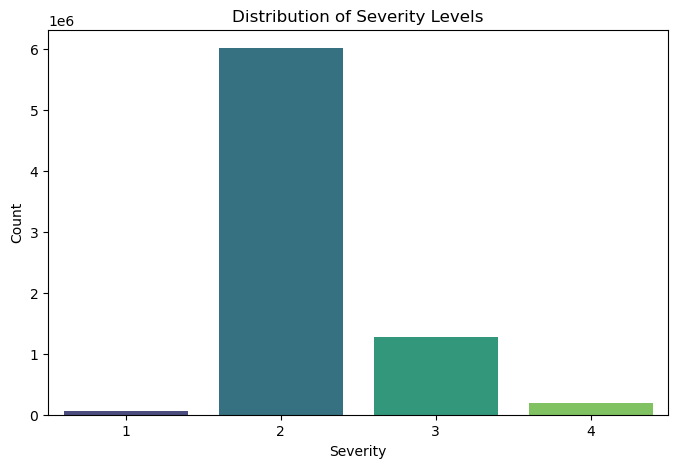

In [157]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Severity', palette='viridis')
plt.title("Distribution of Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<b> For Temperature

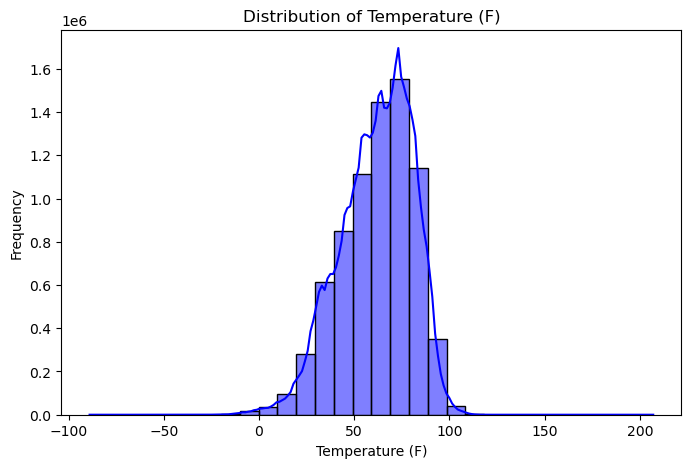

In [140]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Temperature(F)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.gcf().savefig("Temp_Outlier.png")
plt.show()

In [160]:
temperature_stats = df['Temperature(F)'].describe()
print("Summary Statistics for Temperature(F):")
print(temperature_stats)

Summary Statistics for Temperature(F):
count    7.549712e+06
mean     6.170337e+01
std      1.897933e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64


In [161]:
df["Temperature(F)"].nsmallest(10)

1507306   -89.0
1507308   -89.0
1507310   -89.0
1507312   -89.0
1507313   -89.0
1507315   -89.0
1507316   -89.0
1507317   -89.0
6943963   -89.0
6943969   -89.0
Name: Temperature(F), dtype: float64

In [162]:
df["Temperature(F)"].nlargest(10)

4121883    207.0
4451773    207.0
4922942    207.0
1354937    203.0
911675     196.0
911743     196.0
5480192    196.0
5722770    196.0
5882206    196.0
1254863    189.0
Name: Temperature(F), dtype: float64

<p> This are clearly outliers, we will simply drop those</p>

In [168]:
df = df[(df['Temperature(F)'] > -50) & (df['Temperature(F)'] < 120)]

<b> For Humidity(%)

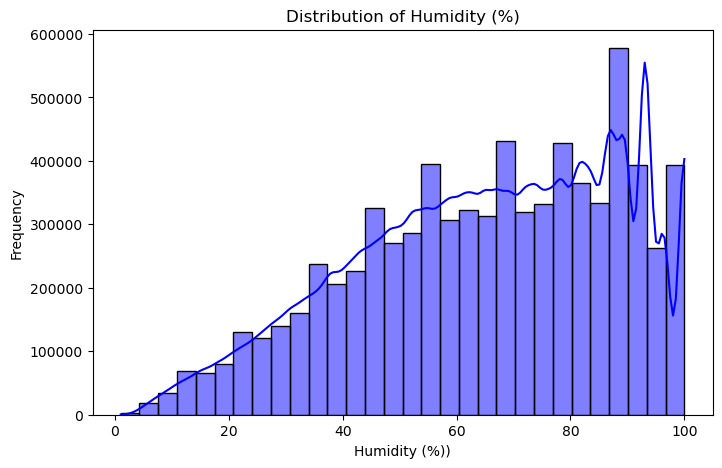

In [172]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Humidity(%)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%))')
plt.ylabel('Frequency')
plt.show()

In [174]:
humidity_stats = df['Humidity(%)'].describe()
print("Summary Statistics for Humidity(%):")
print(humidity_stats)

Summary Statistics for Humidity(%):
count    7.549629e+06
mean     6.482916e+01
std      2.278877e+01
min      1.000000e+00
25%      4.800000e+01
50%      6.700000e+01
75%      8.400000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64


<p> No Outlier Detected </p>

<b> For Pressure(in)

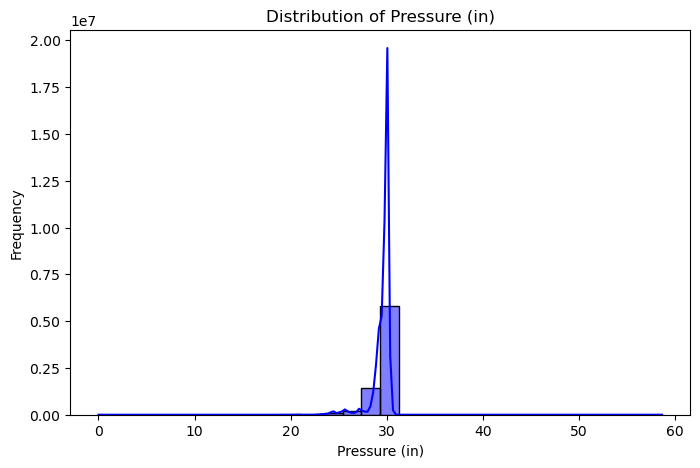

In [142]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Pressure(in)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Pressure (in)')
plt.xlabel('Pressure (in)')
plt.ylabel('Frequency')
plt.gcf().savefig("Pressure_outlier.png")
plt.show()

In [180]:
pressure_stats = df['Pressure(in)'].describe()
print("Summary Statistics for Pressure(in):")
print(pressure_stats)

Summary Statistics for Pressure(in):
count    7.549629e+06
mean     2.953978e+01
std      1.002766e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64


<p> Pressure can not be 0, let us remove those records </p>

In [144]:
df = df[df["Pressure(in)"] > 0]

<b> For Visibility(mi)

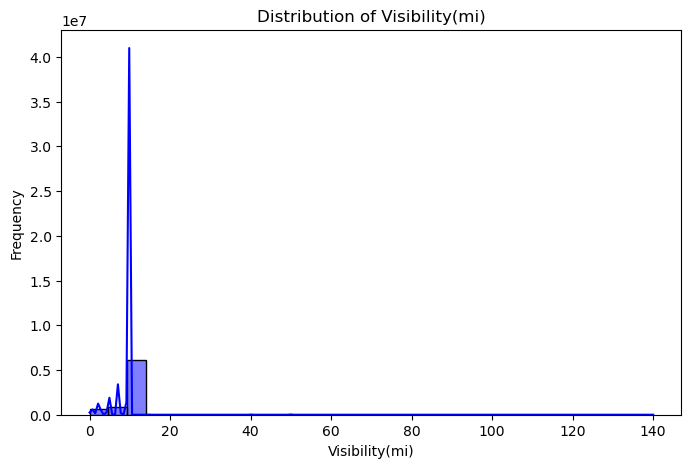

In [185]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Visibility(mi)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Frequency')
plt.show()

In [187]:
visibility_stats = df['Visibility(mi)'].describe()
print("Summary Statistics for Visibility(mi):")
print(visibility_stats)

Summary Statistics for Visibility(mi):
count    7.549627e+06
mean     9.090997e+00
std      2.682279e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64


<p> No Outlier Detected </p>

<b> For Wind_Speed(mph)

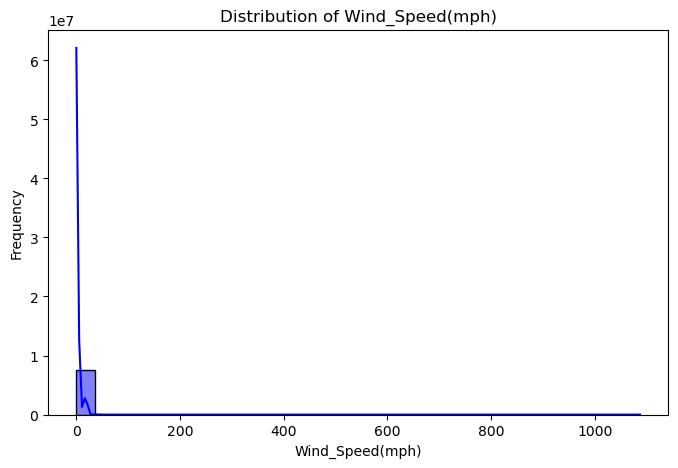

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Wind_Speed(mph)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Wind_Speed(mph)')
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Frequency')
plt.gcf().savefig("WindSpeed_Outlier.png")
plt.show()

In [193]:
wind_stats = df['Wind_Speed(mph)'].describe()
print("Summary Statistics for Wind_Speed(mph):")
print(wind_stats)

Summary Statistics for Wind_Speed(mph):
count    7.549627e+06
mean     7.624073e+00
std      5.302822e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64


<p>Keeping wind_speed less than 200, others are clearly outliers </p>

In [148]:
df = df[df["Wind_Speed(mph)"] <= 200]

<b> For Precipitation

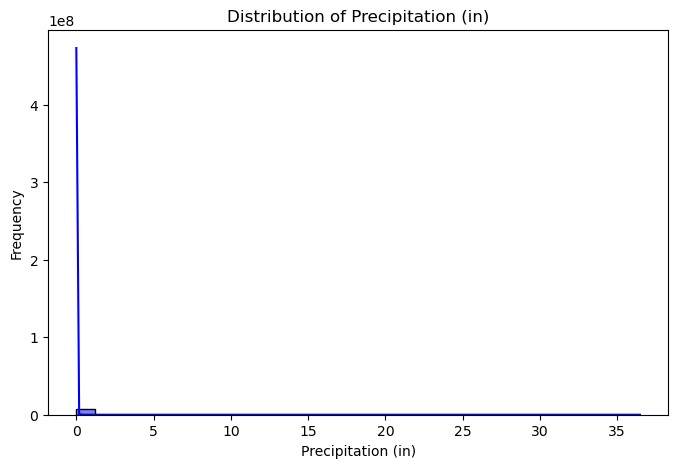

In [201]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Precipitation(in)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Precipitation (in)')
plt.xlabel('Precipitation (in)')
plt.ylabel('Frequency')
plt.show()

In [202]:
prep_stats = df['Precipitation(in)'].describe()
print("Summary Statistics for Precipitation (in):")
print(prep_stats)

Summary Statistics for Precipitation (in):
count    7.549593e+06
mean     4.680640e-02
std      1.376474e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e-02
max      3.647000e+01
Name: Precipitation(in), dtype: float64


<p> No Outliers Detected

In [150]:
df.shape

(7549676, 34)

<h3> Binning & Feature Engineering </h3>

In [154]:
df["Year"] = df["Start_Time"].dt.year

In [155]:
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6])

In [158]:
df["Is_Weekend"].replace(False, 0, inplace = True)
df["Is_Weekend"].replace(True, 1, inplace = True)

In [159]:
temperature_bins = [-float('inf'), 32, 50, 70, 90, float('inf')]
temperature_labels = ['Very Cold', 'Cold', 'Moderate', 'Hot', 'Very Hot']

In [162]:
df['Temperature_Category'] = pd.cut(df['Temperature(F)'], bins=temperature_bins, labels=temperature_labels, include_lowest=True)

In [166]:
distance_bins = [-float('inf'), 5, 20, float('inf')]
distance_labels = ['Short', 'Medium', 'Long']

In [168]:
df['Distance_Category'] = pd.cut(df['Distance(mi)'], bins=distance_bins, labels=distance_labels, include_lowest=True)

In [170]:
humidity_bins = [-float('inf'), 40, 70, 100]
humidity_labels = ['Low', 'Medium', 'High']

In [172]:
df['Humidity_Category'] = pd.cut(df['Humidity(%)'], bins=humidity_bins, labels=humidity_labels, include_lowest=True)

In [176]:
pressure_bins = [-float('inf'), 29.5, 30.5, float('inf')]
pressure_labels = ['Low', 'Normal', 'High']

In [178]:
df['Pressure_Category'] = pd.cut(df['Pressure(in)'], bins=pressure_bins, labels=pressure_labels, include_lowest=True)

In [182]:
wind_speed_bins = [-float('inf'), 10, 25, float('inf')]
wind_speed_labels = ['Low', 'Moderate', 'High']

In [184]:
df['Wind_Speed_Category'] = pd.cut(df['Wind_Speed(mph)'], bins=wind_speed_bins, labels=wind_speed_labels, include_lowest=True)

In [186]:
precipitation_bins = [-float('inf'), 0, 0.1, 1, float('inf')]
precipitation_labels = ['None', 'Light', 'Moderate', 'Heavy']

In [188]:
df['Precipitation_Category'] = pd.cut(df['Precipitation(in)'], bins=precipitation_bins, labels=precipitation_labels, include_lowest=True)

In [192]:
visibility_bins = [-float('inf'), 1, 3, float('inf')]
visibility_labels = ['Low Visibility', 'Moderate Visibility', 'High Visibility']

In [194]:
df['Visibility_Category'] = pd.cut(df['Visibility(mi)'], bins=visibility_bins, labels=visibility_labels, include_lowest=True)

In [45]:
df["State"].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

<h1> 2. Data Cleaning - Department of Transportation Data

In [47]:
state_to_abbreviation = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
    "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

In [41]:
df_driver_nums = pd.read_excel("drivers_total.xlsx", header=4)

In [43]:
df_driver_nums.head()

,STATE,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,3665180.0,3691762.0,3753550.0,3782284.0,3805751.0,3798552.0,3827522.0,3859403.0,3881542.0,3907038.0,3943082.0,3954378.0,3999057.0,4026151.0,4042900.0,4061837.0,4087885.0
1,Alaska (2),489024.0,495249.0,503162.0,507759.0,515239.0,521280.0,526371.0,528873.0,531744.0,533227.0,534585.0,534585.0,536033.0,529281.0,518872.0,519288.0,521220.0
2,Arizona,4032643.0,4153739.0,4315579.0,4403390.0,4443647.0,4592398.0,4697579.0,4791450.0,4881801.0,4978762.0,5082305.0,5164966.0,5284970.0,5369210.0,5681495.0,5795216.0,5847661.0
3,Arkansas,2034975.0,2046039.0,2055189.0,2065065.0,2077806.0,1956091.0,2199164.0,2097201.0,2111873.0,2119578.0,2391103.0,2417464.0,2145334.0,2153929.0,2153929.0,2306921.0,2306921.0
4,California,23021279.0,23467452.0,23697667.0,23680643.0,23753441.0,23856600.0,24200997.0,24390236.0,24813346.0,25532920.0,26199436.0,26777132.0,27039400.0,27213650.0,27005302.0,27112595.0,27632103.0


In [53]:
df_driver_nums["STATE"] = df_driver_nums["STATE"].map(state_to_abbreviation).fillna(df_driver_nums["STATE"])

In [57]:
df_driver_nums.rename(columns={'STATE': 'State'}, inplace=True)

In [59]:
df_driver_nums = df_driver_nums[df_driver_nums["State"].str.len() <= 2]

In [63]:
df_driver_nums.rename(columns={'2016': 'Driver_Total_2016'}, inplace=True)
df_driver_nums.rename(columns={'2017': 'Driver_Total_2017'}, inplace=True)
df_driver_nums.rename(columns={'2018': 'Driver_Total_2018'}, inplace=True)
df_driver_nums.rename(columns={'2019': 'Driver_Total_2019'}, inplace=True)
df_driver_nums.rename(columns={'2020': 'Driver_Total_2020'}, inplace=True)
df_driver_nums.rename(columns={'2021': 'Driver_Total_2021'}, inplace=True)
df_driver_nums.rename(columns={'2022': 'Driver_Total_2022'}, inplace=True)

<h1> Storing Cleaned Data</h1>

In [196]:
df.to_pickle("Data/cleaned.pkl")

In [ ]:
df_driver_nums.to_pickle("reg_driver_data.pkl")